A sentiment analysis carried out on the reviews left by hotel customers on hotels.ng to better advise hotel managements on how to improve their hospitality services for upward profit mobility.

                        WEB-SCRAPPING
                        
Webscrapping of the hotels.ng site was performed with the Octoparse tool, a very powerful web-scrapping tool that scrappes data in a structured format.

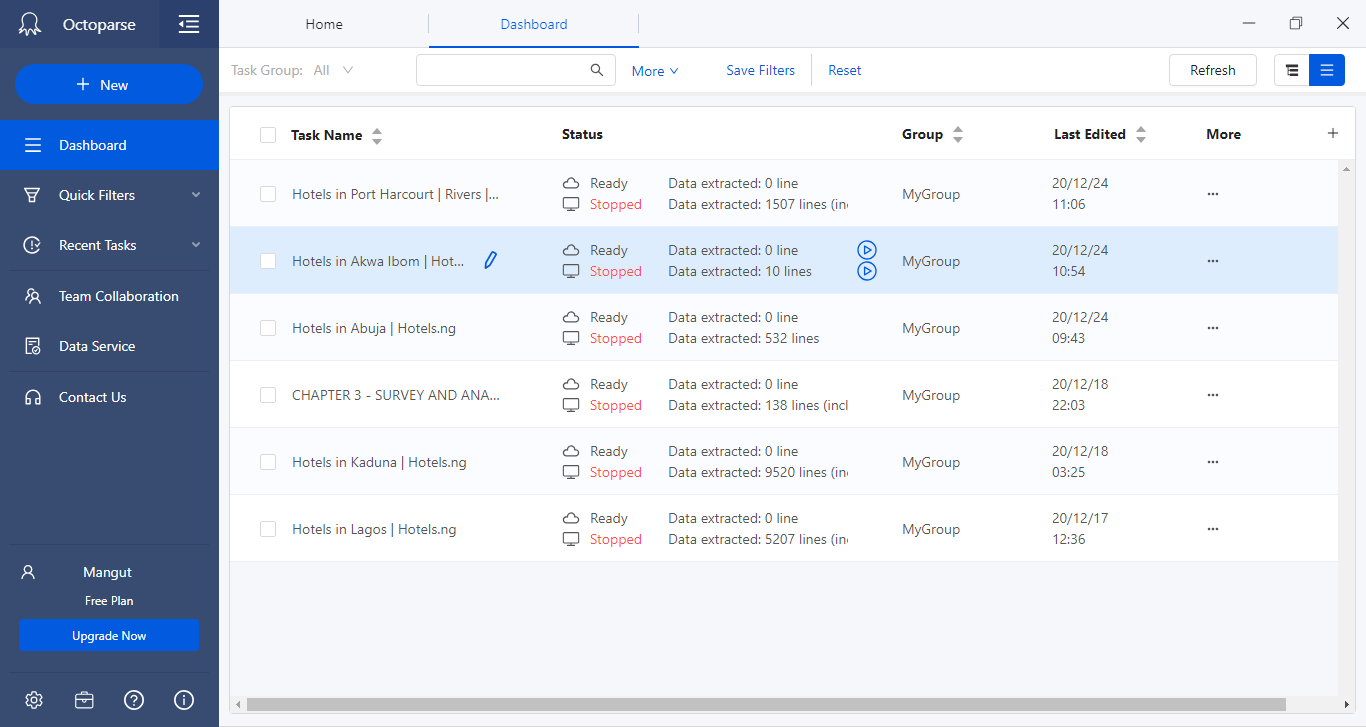

In [ ]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# using pandas to read the csv files
df1 = pd.read_csv("https://raw.githubusercontent.com/TGA-Sept-Cohort-Group-A/Reviews-Project/main/Abuja%20Hotels.csv")
df2 = pd.read_csv('https://raw.githubusercontent.com/TGA-Sept-Cohort-Group-A/Reviews-Project/main/Lagos%20Hotels.csv')
df3 = pd.read_csv("https://raw.githubusercontent.com/TGA-Sept-Cohort-Group-A/Reviews-Project/main/Kaduna%20Hotels.csv")

Here we used the pandas .read_csv() function to read each of the files for the diffrent cities, Abuja, Lagos and Kaduna

In [ ]:
# Renaming the 'Title' column as 'Hotel_Title'
df1 = df1.rename(columns = {'Title':'Hotel_Title','Review':'Review_Text'}, inplace = False)

We noticed that the table format/headings for the cities were not the same all through so we renamed them, the ones for Abuja specifically

In [ ]:
#Dropping some columns that are irrelevant to the analysis
df2.drop('Number', axis = 1, inplace = True)
df2.drop('Like', axis = 1, inplace = True)
df3.drop('Number_of_Reviews', axis = 1, inplace = True)

There were columns in two of the three files we considered as irrelevant to our work and so we dropped them

In [ ]:
df1['State'] = 'Abuja'
df2['State'] = 'Lagos'
df3['State'] = 'Kaduna'

A separate 'State' column was created for each city to indicate the state that each city is in

In [ ]:
#combine all files in the list
combined_csv = pd.concat([df1,df2,df3])

Here the dataframes for the three cities were combined

In [ ]:
combined_csv.head()

This was so we could see that the concat worked 

In [ ]:
# getting an overview of the columns of the dataset
combined_csv.info()

This was so we could get an overview of what the data set looked in terms of the columns and the content in them; how many had all the information needed intact

In [ ]:
combined_csv.describe()

This was to get a brief description of the columns; a little like what was done above -numerical entries specifically

In [ ]:
# changing the string entries for the 'Price' column to numeric values
combined_csv['Price'] = pd.to_numeric(combined_csv.Price.str.replace('[^\d.]', ''), errors='coerce')

Seeing that the 'Price' and 'Rating' columns had string values, they were converted to numeric values

In [ ]:
# making the same changes to the 'Rating' column
combined_csv['Rating'] = pd.to_numeric(combined_csv.Rating.str.replace('[^\d.]', ''), errors='coerce')

In [ ]:
combined_csv.head()

In [ ]:
# getting the mean of the 'Rating' column and rounding it off to one decimal point
mean_Rating = round(combined_csv['Rating'].mean(),1)

We saw that there were a lot of NaN entries in the 'Rating' column and decided to take the average and .fillna() with it seeing as a connsiderable amount of data(review texts) would be lost if we just dropped rows with NaN entries

In [ ]:
mean_Rating 

In [ ]:
# filling the NaNs of the 'Rating' column with its mean
combined_csv['Rating'] = combined_csv['Rating'].fillna(mean_Rating)

This is where the filling in was done

In [ ]:
# dropping the NaN entries in any row
combined_csv.dropna(how ='any', axis = 0, inplace = True)

Here, the rows with NaN/null entries were dropped across all columns in the dataset.

In [ ]:
# saving the cleaned dataset as a csv file
combined_csv.to_csv('Hotels Combined.csv')

The cleaned, combined dataset was saved as a csv file.

In [ ]:
# # in_cities = dataset.groupby(['Hotel_Title', 'City'])
# combined_csv['City'].value_counts().plot.bar()

In [ ]:
#using the Groupby Function to aggregate the City and Hotel_Title columns
hotels_in_cities = combined_csv.groupby(['City' ,'Hotel_Title'])

Here, hotels were grouped by what part of whatever city they were located

In [ ]:
hotels_in_cities.first()

A direct description of the groupby

In [ ]:
#using the Groupby Function to aggregate the price and Hotel_Title columns
price_per_city = combined_csv.groupby(['Price','Hotel_Title'])

Here, hotels were grouped by their prices

In [ ]:
price_per_city.first()

To begin prepping the review texts for a wordcloud, the 'Review_Text' entries(characters) were all change to lower case

In [ ]:
combined_csv['Cleaned'] = combined_csv["Review_Text"].apply(lambda x: x.lower())

In [ ]:
#importing string and regex libraries
import string
import re

In [ ]:
# removing punctuations
combined_csv['Cleaned'] = combined_csv['Cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

Here regex functions were used to remove the punctuations in the texts

In [ ]:
# removing the spaces caused by the removal of punctations
combined_csv['Cleaned']=combined_csv['Cleaned'].apply(lambda x: re.sub(' +',' ',x))

Here regex was also used to remove any additonal spaces left where the punctuations used to be

In [ ]:
for index,text in enumerate(combined_csv['Cleaned'][35:40]):
    print('Review %d:\n'%(index+1),text)

This codejust printed out five texts just so we can see that the preceeding processes worked 

In [ ]:
# !pip install wordcloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
# !pip install spacy
# !python -m spacy download en_core_web_sm    #downloading the spacy language model

In [ ]:
#Importing the Spacy NLP library 
import spacy

Here we imported Spacy, an open source library and used it for pre-processing the texts

In [ ]:
#loading the core english language model to the library
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

In [ ]:
#Lemmatization converts words in the second or third forms to their first form variants
combined_csv['lemmatized']=combined_csv['Cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

Here, the lemmatization removed the stopwords

In [ ]:
dataset_grouped=combined_csv[['Hotel_Title','lemmatized']].groupby(by='Hotel_Title').agg(lambda x:' '.join(x))
dataset_grouped.head()

Here, the finally state of the pre-processed texts can be seen, grouped by the hotels

In [ ]:
# a wordcloud of review texts from all the hotels
wordcloud = WordCloud(width = 800, height = 800, 
                colormap="Dark2",  
                min_font_size = 10).generate(' '.join(combined_csv['lemmatized'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

This is the wordcloud generated from the pre-processed texts from reviews

In [ ]:
#visualising the price vs Rating on a heatmap
correl = combined_csv[['Price','Rating']]
correl.corr()
sns.heatmap(correl.corr(), annot = True)

This was to see if there was any correlation so to speak between prices of these hotels and the reviews left them by customers

In [ ]:
#counting the occurence of the cities with hotels for the three states
combined_csv['City'].value_counts()

In [ ]:
#wordcloud for the cities with hotels in them, using the three cities; Abuja, Lagos,Kaduna
wordcloud = WordCloud(width = 800, height = 800, 
                colormap="Dark2",  
                min_font_size = 10).generate(' '.join(combined_csv['City'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [ ]:
#getting a count on the number of times a city appears
State_City = combined_csv.groupby(["State", "City"]).size().reset_index(name="Time")
State_City

In [ ]:
#aggregating Abuja from the combined_csv for the hotel cities in Abuja
Hotel_Cities_Abuja = combined_csv.loc[combined_csv["State"] == "Abuja"]

In [ ]:
#wordcloud for the cities in Abuja showing the frequency 
wordcloud = WordCloud(width = 800, height = 800, 
                colormap="Dark2",  
                min_font_size = 10).generate(' '.join(Hotel_Cities_Abuja['City'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [ ]:
#aggregating from the combined_csv for the hotel cities in Lagos
Hotel_Cities_Lagos = combined_csv.loc[combined_csv["State"] == "Lagos"]

In [ ]:
#wordcloud for the cities in Lagos showing the frequency 
wordcloud = WordCloud(width = 800, height = 800, 
                colormap="Dark2",  
                min_font_size = 10).generate(' '.join(Hotel_Cities_Lagos['City'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [ ]:
#aggregating from the combined_csv for the hotel cities in Kaduna
Hotel_Cities_Kaduna = combined_csv.loc[combined_csv["State"] == "Kaduna"]

In [ ]:
#wordcloud for the cities in Lagos showing the frequency 
wordcloud = WordCloud(width = 800, height = 800, 
                colormap="Dark2",  
                min_font_size = 10).generate(' '.join(Hotel_Cities_Kaduna['City'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [ ]:
#aggregating Abuja from the combined_csv for the Review_text in Abuja
Review_Text_Abuja = combined_csv.loc[combined_csv["State"] == "Abuja"]

In [ ]:
Review_Text_Abuja.head(4)

In [ ]:
#wordcloud for the Review_text in Abuja showing the frequency 
wordcloud = WordCloud(width = 800, height = 800, 
                colormap="Dark2",  
                min_font_size = 10).generate(' '.join(Review_Text_Abuja['Cleaned'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [ ]:
#aggregating Lagos from the combined_csv for the Review_text in Lagos
Review_Text_Lagos = combined_csv.loc[combined_csv["State"] == "Lagos"]
Review_Text_Lagos.head(2)

In [ ]:
#wordcloud for the Review_text in Lagos showing the frequency 
wordcloud = WordCloud(width = 800, height = 800, 
                colormap="Dark2",  
                min_font_size = 10).generate(' '.join(Review_Text_Lagos['Cleaned'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [ ]:
#aggregating Kaduna from the combined_csv for the Review_text in Kaduna
Review_Text_Kaduna = combined_csv.loc[combined_csv["State"] == "Kaduna"]
Review_Text_Kaduna.head(2)

In [ ]:
#wordcloud for the Review_text in Kaduna showing the frequency 
wordcloud = WordCloud(width = 800, height = 800, 
                colormap="Dark2",  
                min_font_size = 10).generate(' '.join(Review_Text_Kaduna['Cleaned'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()